In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
f1=pd.read_csv("./files/fraud_oracle.csv")
f1.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


1- Data Cleaning
Fixing the rows and columns, , Impute/Remove missing values, Feature Engineering Techniques, Feature Reduction Techniques, Handling Outliers, Standardizing values, Overfitting and Underfitting
Before applying Eda and after applying EDA Visualize the effect.

In [3]:
df1=pd.DataFrame(f1)
df1.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [4]:
df1.isnull().any()

Month                   False
WeekOfMonth             False
DayOfWeek               False
Make                    False
AccidentArea            False
DayOfWeekClaimed        False
MonthClaimed            False
WeekOfMonthClaimed      False
Sex                     False
MaritalStatus           False
Age                     False
Fault                   False
PolicyType              False
VehicleCategory         False
VehiclePrice            False
FraudFound_P            False
PolicyNumber            False
RepNumber               False
Deductible              False
DriverRating            False
Days_Policy_Accident    False
Days_Policy_Claim       False
PastNumberOfClaims      False
AgeOfVehicle            False
AgeOfPolicyHolder       False
PoliceReportFiled       False
WitnessPresent          False
AgentType               False
NumberOfSuppliments     False
AddressChange_Claim     False
NumberOfCars            False
Year                    False
BasePolicy              False
dtype: boo

In [19]:
m=df1.dtypes
m

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                     int64
BasePoli

<Axes: xlabel='count', ylabel='AccidentArea'>

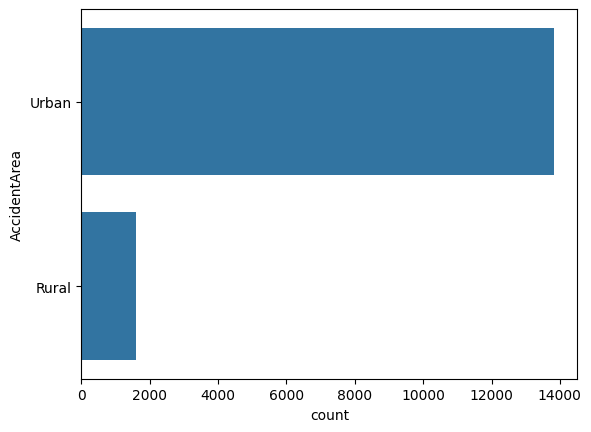

In [5]:
sns.countplot(df1["AccidentArea"])

<Axes: ylabel='count'>

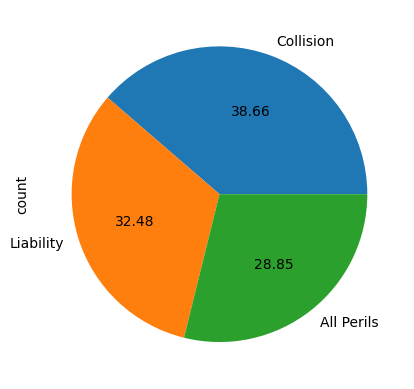

In [6]:
df1["BasePolicy"].value_counts().plot(kind="pie",autopct='%.2f')

<Axes: xlabel='count', ylabel='AgentType'>

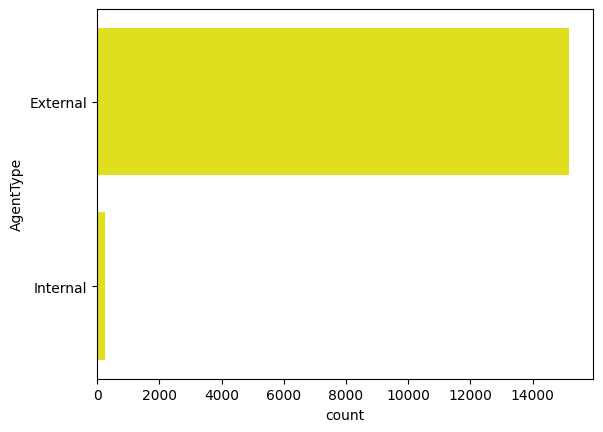

In [7]:
sns.countplot(df1["AgentType"],color="yellow")

(array([3450., 3720., 3583., 3433., 1234.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

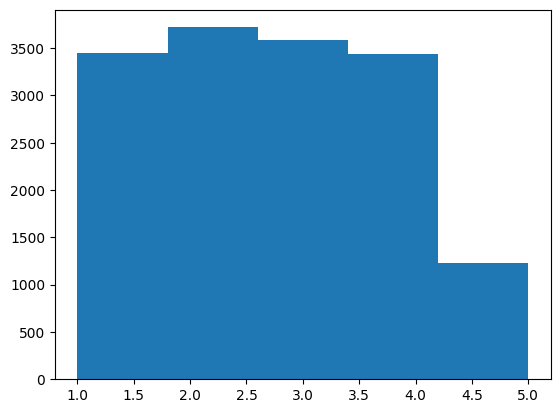

In [8]:
#numerical data
plt.hist(df1["WeekOfMonthClaimed"],bins=5)

In [14]:
#data cleaning : Applying cca on the dataframe
cols=[var for var in df1.columns if df1[var].isnull().mean() < 13 and df1[var].isnull().mean()>0 ]
cols

[]

In [15]:
df1.shape

(15420, 33)

In [28]:
new_df=df1.select_dtypes(include=['int64','int32','float','double'])
new_df

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
0,5,1,21,0,1,12,300,1,1994
1,3,4,34,0,2,15,400,4,1994
2,5,2,47,0,3,7,400,3,1994
3,2,1,65,0,4,4,400,2,1994
4,5,2,27,0,5,3,400,1,1994
...,...,...,...,...,...,...,...,...,...
15415,4,5,35,1,15416,5,400,4,1996
15416,5,1,30,0,15417,11,400,3,1996
15417,5,1,24,1,15418,4,400,4,1996
15418,1,2,34,0,15419,6,400,4,1996


<Axes: xlabel='Age', ylabel='Density'>

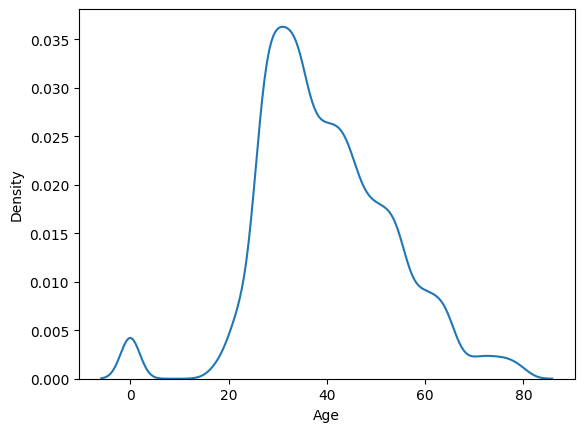

In [24]:
sns.kdeplot(new_df['Age'])

<Axes: xlabel='Deductible', ylabel='Density'>

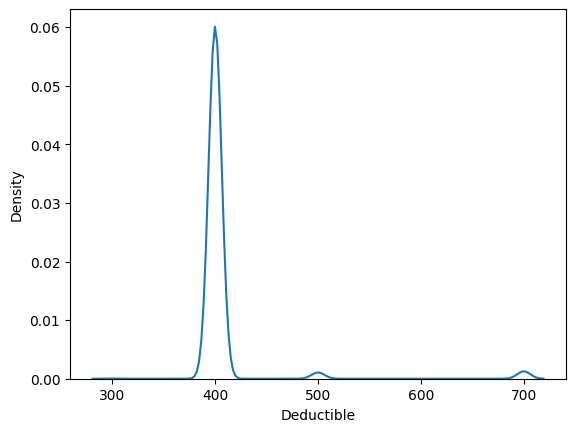

In [25]:
sns.kdeplot(new_df['Deductible'])

<Axes: xlabel='DriverRating', ylabel='Density'>

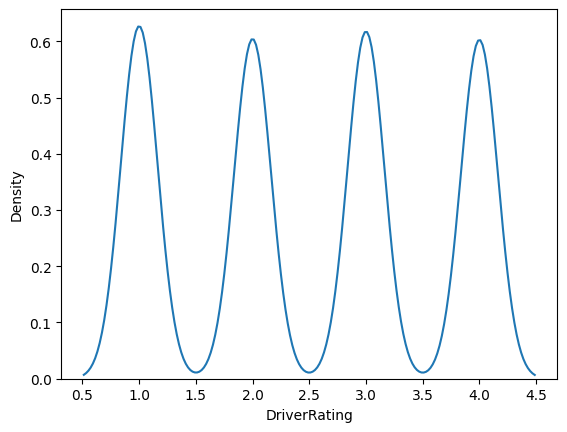

In [26]:
sns.kdeplot(new_df['DriverRating'])

<Axes: xlabel='RepNumber', ylabel='Density'>

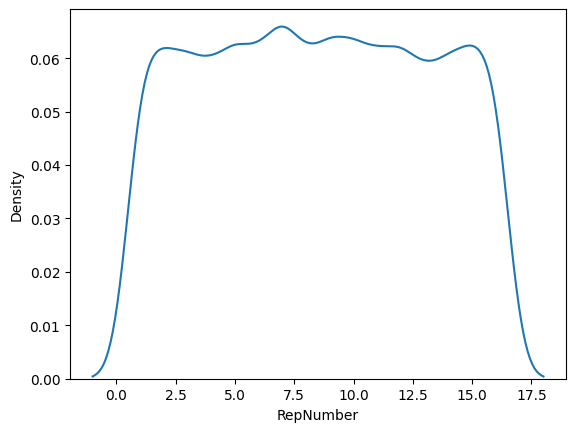

In [27]:
sns.kdeplot(new_df['RepNumber'])

<Axes: xlabel='Deductible', ylabel='DriverRating'>

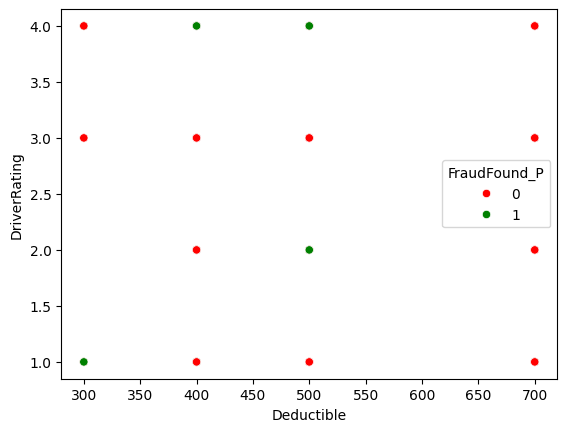

In [45]:
color_dict={0:"red",1:"green"}
sns.scatterplot(x=new_df["Deductible"],y=new_df["DriverRating"],hue=new_df["FraudFound_P"],palette=color_dict)


In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(new_df.drop("FraudFound_P",axis=1),
                                               new_df["FraudFound_P"],test_size=0.3,random_state=0)

In [47]:
x_train.shape,x_test.shape

((10794, 8), (4626, 8))

In [49]:
from sklearn.preprocessing import MinMaxScaler
#MinMax Scaler shrinks the data within the given range, usually of 0 to 1. 
# It transforms data by scaling features to a given range. '
# It scales the values to a specific value range without changing the shape of the original distribution

scaler=MinMaxScaler()
# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [50]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [51]:
np.round(x_train.describe(),1)

,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,10794.0,10794.0,10794.0,10794.0,10794.0,10794.0,10794.0,10794.0
mean,2.8,2.7,39.7,7689.9,8.5,407.6,2.5,1994.9
std,1.3,1.3,13.5,4470.7,4.6,43.4,1.1,0.8
min,1.0,1.0,0.0,1.0,1.0,300.0,1.0,1994.0
25%,2.0,2.0,30.0,3778.2,5.0,400.0,1.0,1994.0
50%,3.0,3.0,38.0,7686.0,8.0,400.0,2.0,1995.0
75%,4.0,4.0,48.0,11576.8,12.0,400.0,3.0,1996.0
max,5.0,5.0,80.0,15418.0,16.0,700.0,4.0,1996.0


In [52]:
np.round(x_train_scaled.describe(),1)

,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,10794.0,10794.0,10794.0,10794.0,10794.0,10794.0,10794.0,10794.0
mean,0.4,0.4,0.5,0.5,0.5,0.3,0.5,0.4
std,0.3,0.3,0.2,0.3,0.3,0.1,0.4,0.4
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.2,0.2,0.4,0.2,0.3,0.2,0.0,0.0
50%,0.5,0.5,0.5,0.5,0.5,0.2,0.3,0.5
75%,0.8,0.8,0.6,0.8,0.7,0.2,0.7,1.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


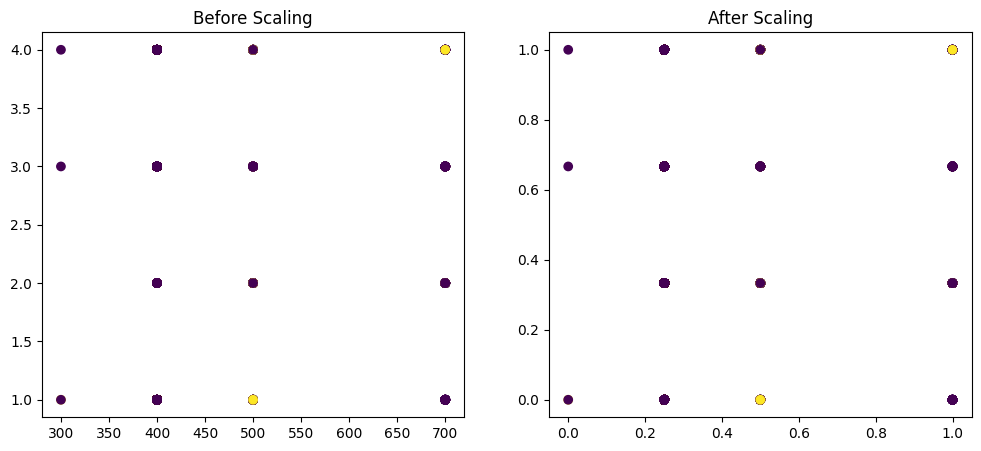

In [53]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train["Deductible"], x_train["DriverRating"],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Deductible'], x_train_scaled['DriverRating'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

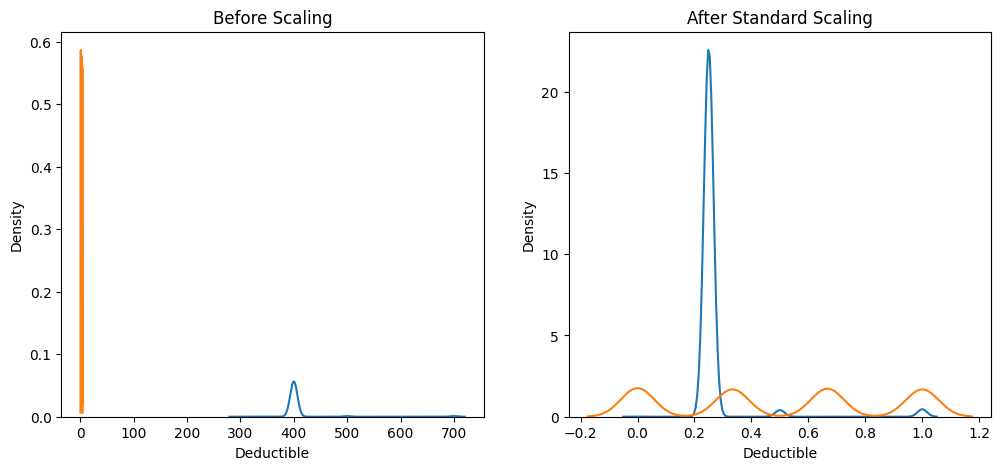

In [54]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train["Deductible"], ax=ax1)
sns.kdeplot(x_train["DriverRating"], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Deductible'], ax=ax2)
sns.kdeplot(x_train_scaled['DriverRating'], ax=ax2)
plt.show()